In [48]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [103]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [86]:
#features and target selection
features = ['team_1', 'team_2', '_map', 'starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [87]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'team_1'] = le.fit_transform(X['team_1'])
X.loc[:, 'team_2'] = le.fit_transform(X['team_2'])
X.loc[:, '_map'] = le.fit_transform(X['_map'])
X.head()

/home/sergio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,team_1,team_2,_map,starting_ct,rank_1,rank_2
0,791,1053,3,2,62,63
1,791,1053,4,2,62,63
2,654,1014,4,1,140,118
3,830,136,4,2,61,38
4,830,136,9,2,61,38


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
print('Train score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg.score(X_test, y_test)))

Train score: 0.628
Test score: 0.629


In [90]:
#analyzing C
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.001, max_iter=100000).fit(X_train, y_train)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print('Train score(C=1): {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score(C=1): {:.3f}'.format(logreg.score(X_test, y_test)))
print('Train score(C=100): {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test score(C=100): {:.3f}'.format(logreg100.score(X_test, y_test)))
print('Train score(C=0.001): {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test score(C=0.001): {:.3f}'.format(logreg001.score(X_test, y_test)))

Train score(C=1): 0.628
Test score(C=1): 0.629
Train score(C=100): 0.628
Test score(C=100): 0.629
Train score(C=0.001): 0.628
Test score(C=0.001): 0.629


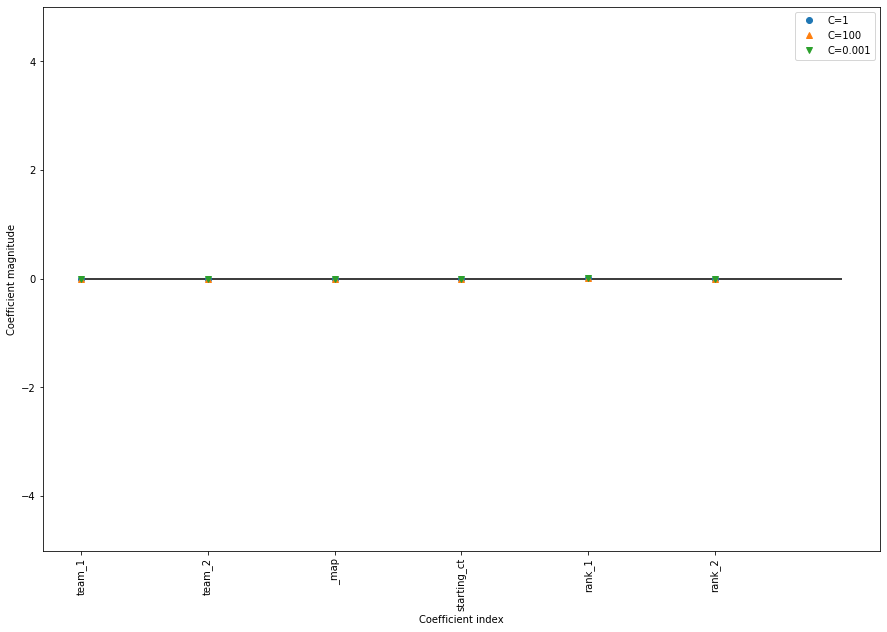

In [100]:
#better use for binary classification...
plt.figure(figsize=(15, 10))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(X.shape[1]), X.columns.values, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()